In [1]:
import sys

# Add the path to the library folder
sys.path.append('./lib')


import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

from model import PDFmodel

In [2]:
models, steps = pickle.load(open("./training_2025-04-09_10-49-15.pkl", "rb"))

In [52]:
fk_grid = np.load('Tommaso/fk_grid.npy')
data = np.load('Tommaso/data.npy')
FK = np.load('Tommaso/FK.npy')
f_bcdms = np.load('Tommaso/f_bcdms.npy')
Cy = np.load('Tommaso/Cy.npy')
Cinv = np.linalg.inv(Cy)
y = FK @ f_bcdms

In [41]:
sigma_1 = []
qsum_sigma = []
ntks = []
for model in models:
  ntk = model.compute_ntk(learning_tensor=True)
  _, S, _ = np.linalg.svd(ntk)
  ntks.append(ntk)
  sigma_1.append(S[0])
  qsum_sigma.append(np.sqrt(np.sum(S**2)))


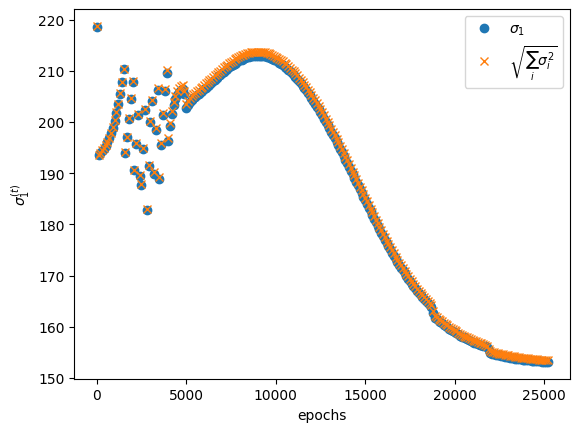

In [42]:
plt.figure()
plt.plot(steps, sigma_1, 'o', label=r'$\sigma_1$')
plt.plot(steps, qsum_sigma, 'x', label=r'$\sqrt{\sum_i \sigma_i^2}$')
plt.xlabel('epochs')
plt.ylabel(r'$\sigma_1^{(t)}$')
plt.legend()
plt.show()

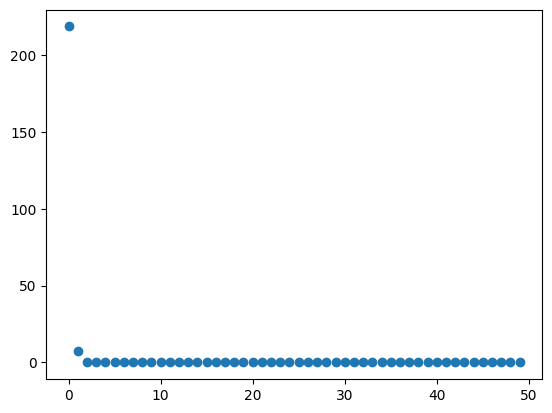

In [60]:
ntk = ntks[0]
U, S, Vh = np.linalg.svd(ntk)
plt.plot(S, 'o')

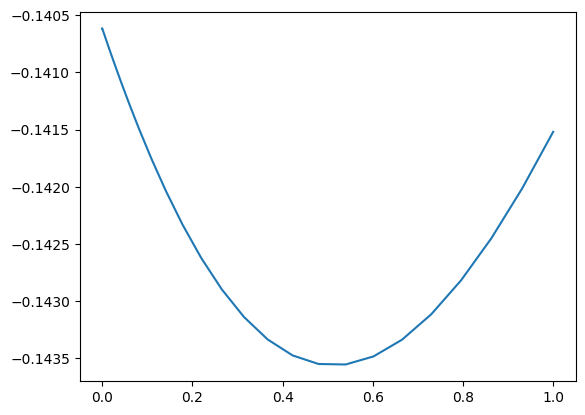

In [61]:
plt.plot(fk_grid, Vh.T[:,0])

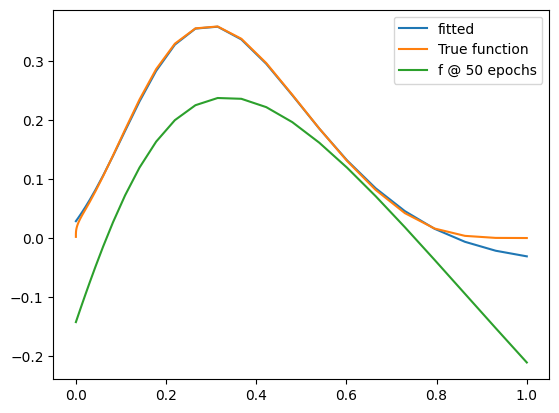

In [43]:
f_bcdms = np.load('Tommaso/f_bcdms.npy')
x = models[-1].inputs.numpy().reshape(-1)
f = models[-1].predict().numpy().reshape(-1)
f_ul = models[50].predict().numpy().reshape(-1)
plt.plot(x,f, label='fitted')
plt.plot(x,f_bcdms, label='True function')
plt.plot(x,f_ul, label='f @ 50 epochs')
plt.legend()

# Reconstruct training steps in functional space

In [37]:
fk_grid = np.load('Tommaso/fk_grid.npy')
data = np.load('Tommaso/data.npy')
FK = np.load('Tommaso/FK.npy')
f_bcdms = np.load('Tommaso/f_bcdms.npy')
Cy = np.load('Tommaso/Cy.npy')
Cinv = np.linalg.inv(Cy)
y = FK @ f_bcdms

def bt(ntk_t):
  return ntk_t @ FK.T @ Cinv @ y

arch = 10000
seed = 123123

# MyDense with Random Normal

In [ ]:
preds = []
ntks_eig = []

for k in range(0,100):
  model = PDFmodel(
                dense_layer='MyLayer',
                input=fk_grid,
                outputs=1,
                architecture=[arch],
                activations=['tanh'],
                kernel_initializer='RandomNormal',
                user_ki_args=None,
                seed=k+seed)
  preds.append(model.predict().numpy().reshape(-1))
  ntk = model.compute_ntk()
  _, S, _ = np.linalg.svd(ntk)
  ntks_eig.append(S[0])

mean_ntk = np.mean(ntks_eig)
std_ntk = np.std(ntks_eig)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0)

print(f"NTK: {mean_ntk} ± {std_ntk}")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
_=axs[0].plot(ntks_eig, 'o')
_=axs[1].plot(fk_grid, mean)
_=axs[1].fill_between(fk_grid, mean-std, mean+std, alpha=0.2)

# Dense Layer Random Normal

In [ ]:
preds = []
ntks_eig = []

for k in range(0,100):
  model = PDFmodel(
                dense_layer='Dense',
                input=fk_grid,
                outputs=1,
                architecture=[arch],
                activations=['tanh'],
                kernel_initializer='RandomNormal',
                user_ki_args=None,
                seed=k+seed)
  preds.append(model.predict().numpy().reshape(-1))
  ntk = model.compute_ntk()
  _, S, _ = np.linalg.svd(ntk)
  ntks_eig.append(S[0])

mean_ntk = np.mean(ntks_eig)
std_ntk = np.std(ntks_eig)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0)

print(f"NTK: {mean_ntk} ± {std_ntk}")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
_=axs[0].plot(ntks_eig, 'o')
_=axs[1].plot(fk_grid, mean)
_=axs[1].fill_between(fk_grid, mean-std, mean+std, alpha=0.2)

# Dense with Glorot Normal

NTK: 158.6845703125 ± 0.10204648971557617


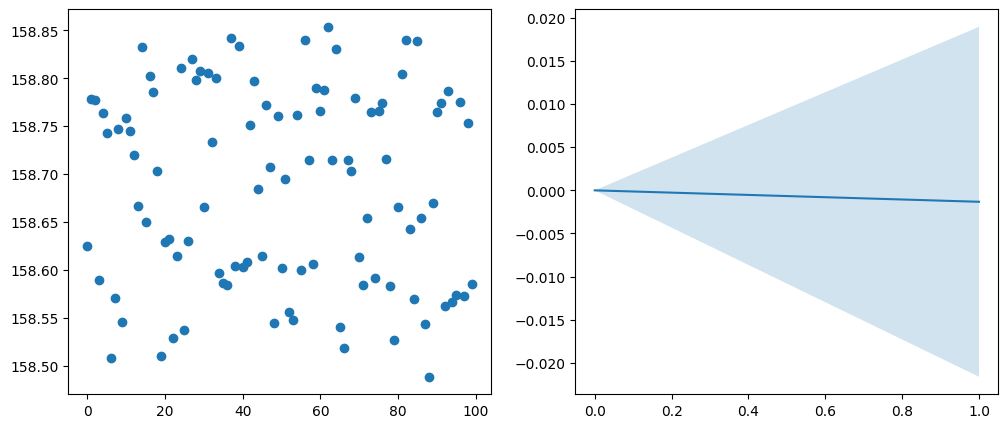

In [44]:
preds = []
ntks_eig = []

for k in range(0,100):
  model = PDFmodel(
                dense_layer='Dense',
                input=fk_grid,
                outputs=1,
                architecture=[arch],
                activations=['tanh'],
                kernel_initializer='GlorotNormal',
                user_ki_args=None,
                seed=k+seed)
  preds.append(model.predict().numpy().reshape(-1))
  ntk = model.compute_ntk()
  _, S, _ = np.linalg.svd(ntk)
  ntks_eig.append(S[0])

mean_ntk = np.mean(ntks_eig)
std_ntk = np.std(ntks_eig)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0)

print(f"NTK: {mean_ntk} ± {std_ntk}")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
_=axs[0].plot(ntks_eig, 'o')
_=axs[1].plot(fk_grid, mean)
_=axs[1].fill_between(fk_grid, mean-std, mean+std, alpha=0.2)

# Dense with He Normal

In [ ]:
preds = []
ntks_eig = []

for k in range(0,100):
  model = PDFmodel(
                dense_layer='Dense',
                input=fk_grid,
                outputs=1,
                architecture=[arch],
                activations=['tanh'],
                kernel_initializer='HeNormal',
                user_ki_args=None,
                seed=k+seed)
  preds.append(model.predict().numpy().reshape(-1))
  ntk = model.compute_ntk()
  _, S, _ = np.linalg.svd(ntk)
  ntks_eig.append(S[0])

mean_ntk = np.mean(ntks_eig)
std_ntk = np.std(ntks_eig)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0)

print(f"NTK: {mean_ntk} ± {std_ntk}")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
_=axs[0].plot(ntks_eig, 'o')
_=axs[1].plot(fk_grid, mean)
_=axs[1].fill_between(fk_grid, mean-std, mean+std, alpha=0.2)

# Dense with Glorot Normal and NNPDF

NTK: 211.60296630859375 ± 35.62230682373047


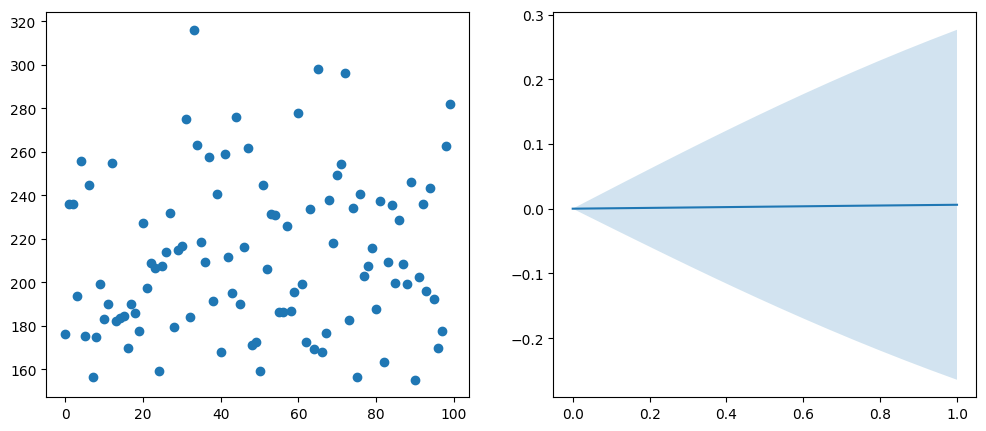

In [38]:
preds = []
ntks_eig = []

for k in range(0,100):
  model = PDFmodel(
                dense_layer='Dense',
                input=fk_grid,
                outputs=1,
                architecture=[28, 25],
                activations=['tanh', 'tanh'],
                kernel_initializer='GlorotNormal',
                user_ki_args=None,
                seed=k+seed)
  preds.append(model.predict().numpy().reshape(-1))
  ntk = model.compute_ntk()
  _, S, _ = np.linalg.svd(ntk)
  ntks_eig.append(S[0])

mean_ntk = np.mean(ntks_eig)
std_ntk = np.std(ntks_eig)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0)

print(f"NTK: {mean_ntk} ± {std_ntk}")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
_=axs[0].plot(ntks_eig, 'o')
_=axs[1].plot(fk_grid, mean)
_=axs[1].fill_between(fk_grid, mean-std, mean+std, alpha=0.2)

# MyDense with Random Normal and NNPDF

In [ ]:
preds = []
ntks_eig = []

for k in range(0,10):
  model = PDFmodel(
                dense_layer='MyLayer',
                input=fk_grid,
                outputs=1,
                architecture=[28, 25],
                activations=['tanh', 'tanh'],
                kernel_initializer='RandomNormal',
                user_ki_args=None,
                seed=k+seed)
  preds.append(model.predict().numpy().reshape(-1))
  ntk = model.compute_ntk()
  _, S, _ = np.linalg.svd(ntk)
  ntks_eig.append(S[0])

mean_ntk = np.mean(ntks_eig)
std_ntk = np.std(ntks_eig)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0)

print(f"NTK: {mean_ntk} ± {std_ntk}")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
_=axs[0].plot(ntks_eig, 'o')
_=axs[1].plot(fk_grid, mean)
_=axs[1].fill_between(fk_grid, mean-std, mean+std, alpha=0.2)